# Combine IMERG and IBTrACS

In [321]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [322]:
import math

import ocha_stratus as stratus
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from src.datasources import ibtracs
from src.constants import *

In [323]:
df_storms = ibtracs.load_storms()

In [325]:
blob_name = f"{PROJECT_PREFIX}/processed/impact/emdat_cerf_upto2024.parquet"
df_impact = stratus.load_parquet_from_blob(blob_name)

In [326]:
df_impact["cerf"] = ~df_impact["Amount in US$"].isnull()

In [327]:
cols = ["sid", "cerf", "Total Affected"]
df_impact[cols]

,sid,cerf,Total Affected
0,2001303N13276,False,5900012.0
1,2002258N10300,False,42500.0
2,2002265N10315,False,281470.0
3,2004223N11301,False,244005.0
4,2004247N10332,False,3245.0
5,2005186N12299,False,2500000.0
6,2005289N18282,False,100000.0
7,2006161N20275,False,268.0
8,2007225N12331,False,NaN
9,2007297N18300,False,192488.0


In [343]:
blob_name = f"{PROJECT_PREFIX}/processed/storm_stats/zma_stats.parquet"
df_stats_raw_meanonly = stratus.load_parquet_from_blob(blob_name)

In [344]:
blob_name = (
    f"{PROJECT_PREFIX}/processed/storm_stats/zma_stats_imerg_quantiles.parquet"
)

df_stats_raw = stratus.load_parquet_from_blob(blob_name)

In [336]:
blob_name = f"{PROJECT_PREFIX}/processed/ibtracs/zma_tracks_2000-2024.parquet"
df_ibtracs = stratus.load_parquet_from_blob(blob_name)

In [449]:
df_ibtracs_agg = (
    df_ibtracs[df_ibtracs["landfall"]]
    .groupby("sid")
    .agg(
        valid_time_min=("valid_time", "min"),
        valid_time_max=("valid_time", "max"),
        wind_speed_max=("wind_speed", "max"),
    )
    .reset_index()
)

In [450]:
df_ibtracs_agg

,sid,valid_time_min,valid_time_max,wind_speed_max
0,2001303N13276,2001-11-04 23:00:00.000053,2001-11-05 00:00:00.000040,115.0
1,2002258N10300,2002-09-20 21:00:00.000040,2002-09-21 00:00:00.000040,75.0
2,2002265N10315,2002-10-01 14:00:00.000053,2002-10-01 18:00:00.000040,90.0
3,2002288N17277,2002-10-16 18:00:00.000040,2002-10-16 18:00:00.000040,25.0
4,2004223N11301,2004-08-13 04:30:00.000040,2004-08-13 06:00:00.000040,105.0
5,2005160N17276,2005-06-10 08:00:00.000053,2005-06-10 08:00:00.000053,45.0
6,2005186N12299,2005-07-08 02:45:00.000053,2005-07-09 00:00:00.000039,120.0
7,2006213N16302,2006-08-06 06:00:00.000039,2006-08-06 06:00:00.000039,20.0
8,2006237N13298,2006-08-28 11:15:00.000039,2006-08-29 00:00:00.000039,35.0
9,2007297N18300,2007-10-30 06:00:00.000039,2007-10-31 06:00:00.000039,50.0


In [455]:
df_stats_raw

,sid,valid_time_min,valid_time_max,wind_speed_max,q50_total,q50_roll2,q50_roll3,q80_total,q80_roll2,q80_roll3,q90_total,q90_roll2,q90_roll3,q95_total,q95_roll2,q95_roll3,q99_total,q99_roll2,q99_roll3
388,2000233N12316,2000-08-24 00:00:00.000040,2000-08-24 12:00:00.000040,40.0,18.190000,18.152500,18.189999,35.830003,35.588001,35.830002,46.248497,45.373501,46.248497,54.451998,53.436249,54.452000,66.406698,66.313896,66.406700
389,2000259N20273,2000-09-16 00:00:00.000040,2000-09-16 12:00:00.000040,55.0,7.749999,5.687500,7.749999,23.514002,20.615002,23.514002,55.725500,45.454998,55.725498,198.752262,198.074738,198.752258,601.477020,583.567200,601.476990
390,2000260N15308,2000-09-19 12:00:00.000040,2000-09-21 00:00:00.000040,30.0,28.482501,21.250000,23.750000,69.307002,57.465000,63.026997,109.906992,101.519501,104.777496,135.362743,126.502251,129.048248,177.652948,167.547638,173.454788
391,2001303N13276,2001-11-03 00:00:00.000040,2001-11-05 06:00:00.000040,120.0,138.927505,76.807495,112.637497,252.810013,196.168976,223.867996,316.176468,275.528503,294.610962,359.474268,316.773743,331.768250,413.908712,379.588867,390.244812
392,2002258N10300,2002-09-18 18:00:00.000040,2002-09-22 00:00:00.000040,110.0,108.217499,40.644997,56.139999,228.351990,96.101990,138.363983,319.502991,160.391495,215.725494,519.295245,390.434479,430.520508,853.606342,650.347717,724.066223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,2024216N20284,2024-08-02 12:00:00.000039,2024-08-04 00:00:00.000039,35.0,54.164997,40.412502,49.295002,100.519991,67.569000,89.244003,138.085010,118.407990,128.767014,169.710000,150.748505,156.888000,232.989563,215.226379,222.375443
469,2024268N17278,2024-09-24 06:00:00.000039,2024-09-26 06:00:00.000039,75.0,36.652500,21.440001,29.037498,122.996997,96.369003,111.023003,193.202472,153.684006,189.156494,233.762012,189.857498,227.883011,289.747283,246.513580,282.273987
470,2024279N21265,2024-10-09 02:05:00.000035,2024-10-09 06:00:00.000039,140.0,3.727500,2.845000,3.727500,8.423999,7.475000,8.424000,12.719999,10.513499,12.719999,16.262250,14.040751,16.262251,25.064249,22.692348,25.064249
471,2024293N21294,2024-10-20 06:00:00.000039,2024-10-22 12:00:00.000039,75.0,12.205000,9.135000,12.029999,33.451001,22.595999,33.451000,67.497000,60.556503,66.997490,159.121494,129.257507,148.582474,439.478544,427.730560,435.983795


In [456]:
df_stats = (
    df_stats_raw.merge(df_stats_raw_meanonly)
    .drop(columns="wind_speed_max")
    .merge(df_ibtracs_agg[["sid", "wind_speed_max"]])
    .merge(df_storms)
)
df_stats

,sid,valid_time_min,valid_time_max,q50_total,q50_roll2,q50_roll3,q80_total,q80_roll2,q80_roll3,q90_total,...,q99_roll3,max_roll2_mean,wind_speed_max,storm_id,atcf_id,season,number,name,provisional,created_at
0,2001303N13276,2001-11-03 00:00:00.000040,2001-11-05 06:00:00.000040,138.927505,76.807495,112.637497,252.810013,196.168976,223.867996,316.176468,...,390.244812,120.507424,115.0,76965add-b379-412f-a169-656ced9e36aa,AL152001,2001,88,MICHELLE,False,2025-05-13 23:12:11.828324
1,2002258N10300,2002-09-18 18:00:00.000040,2002-09-22 00:00:00.000040,108.217499,40.644997,56.139999,228.351990,96.101990,138.363983,319.502991,...,724.066223,81.429310,75.0,029a08e1-1729-4c36-b7ec-20caec8a0274,AL102002,2002,68,ISIDORE,False,2025-05-13 23:12:11.828324
2,2002265N10315,2002-09-28 18:00:00.000040,2002-10-02 00:00:00.000040,57.822502,37.119995,43.507500,92.048996,63.542995,74.527000,121.296996,...,160.742477,43.857528,90.0,423c5f62-c502-4614-b1e1-43be7661c541,AL132002,2002,74,LILI,False,2025-05-13 23:12:11.828324
3,2002288N17277,2002-10-15 18:00:00.000040,2002-10-16 18:00:00.000040,55.100002,37.007500,51.192501,101.779001,81.216003,96.642998,134.672998,...,221.773575,46.730913,25.0,730e397e-17d7-40cb-9568-8135eb8b940f,AL142002,2002,79,UNNAMED,False,2025-05-13 23:12:11.828324
4,2004223N11301,2004-08-12 12:00:00.000040,2004-08-13 06:00:00.000040,26.567500,12.170000,19.224998,55.279998,44.664997,52.632999,78.138000,...,118.276001,22.089554,105.0,e9ebf247-f99d-466a-b960-19510bf1c6d4,AL032004,2004,49,CHARLEY,False,2025-05-13 23:12:11.828324
5,2005160N17276,2005-06-09 12:00:00.000039,2005-06-10 12:00:00.000039,72.662498,50.112495,67.172501,104.294994,81.715996,100.436012,130.889986,...,168.378693,58.019724,45.0,0355b4ea-78cd-4358-a9a6-3b014f3376bc,AL012005,2005,31,ARLENE,False,2025-05-13 23:12:11.828324
6,2005186N12299,2005-07-07 18:00:00.000039,2005-07-09 06:00:00.000039,102.275005,87.290009,93.629997,177.314990,153.271011,167.659973,205.451501,...,317.722046,97.973385,120.0,abac3d78-3ae1-4d70-93ad-09b79c3683dd,AL042005,2005,39,DENNIS,False,2025-05-13 23:12:11.828324
7,2006213N16302,2006-08-05 00:00:00.000039,2006-08-06 12:00:00.000039,24.472499,13.002501,22.117498,42.867996,26.828999,40.574997,52.777000,...,77.942154,16.412007,20.0,3d56362e-999e-4169-84f4-334f01edd42a,AL042006,2006,43,CHRIS,False,2025-05-13 23:12:11.828324
8,2006237N13298,2006-08-28 06:00:00.000039,2006-08-29 18:00:00.000039,29.522500,20.172497,28.139999,92.979987,81.209999,90.658989,128.921994,...,248.238815,42.930994,35.0,d7c8dd15-6b20-463a-9336-96e2e4156ae1,AL062006,2006,57,ERNESTO,False,2025-05-13 23:12:11.828324
9,2007297N18300,2007-10-29 12:00:00.000039,2007-11-01 12:00:00.000039,11.062500,8.742500,9.727501,145.711990,64.883003,97.506004,210.804488,...,231.517471,31.950908,50.0,ef85ac5e-a06c-4af2-858d-d26777b34e11,AL162007,2007,75,NOEL,False,2025-05-13 23:12:11.828324


In [457]:
cols = ["sid", "cerf", "Total Affected"]
df_stats = df_stats.merge(df_impact[cols], how="left")
# note we have to set type as "boolean" (NOT bool) to get the desired behaviour here,
# without throwing warnings
df_stats["cerf"] = df_stats["cerf"].astype("boolean").fillna(False)

In [458]:
target_rp = 4

In [459]:
df_stats

,sid,valid_time_min,valid_time_max,q50_total,q50_roll2,q50_roll3,q80_total,q80_roll2,q80_roll3,q90_total,...,wind_speed_max,storm_id,atcf_id,season,number,name,provisional,created_at,cerf,Total Affected
0,2001303N13276,2001-11-03 00:00:00.000040,2001-11-05 06:00:00.000040,138.927505,76.807495,112.637497,252.810013,196.168976,223.867996,316.176468,...,115.0,76965add-b379-412f-a169-656ced9e36aa,AL152001,2001,88,MICHELLE,False,2025-05-13 23:12:11.828324,False,5900012.0
1,2002258N10300,2002-09-18 18:00:00.000040,2002-09-22 00:00:00.000040,108.217499,40.644997,56.139999,228.351990,96.101990,138.363983,319.502991,...,75.0,029a08e1-1729-4c36-b7ec-20caec8a0274,AL102002,2002,68,ISIDORE,False,2025-05-13 23:12:11.828324,False,42500.0
2,2002265N10315,2002-09-28 18:00:00.000040,2002-10-02 00:00:00.000040,57.822502,37.119995,43.507500,92.048996,63.542995,74.527000,121.296996,...,90.0,423c5f62-c502-4614-b1e1-43be7661c541,AL132002,2002,74,LILI,False,2025-05-13 23:12:11.828324,False,281470.0
3,2002288N17277,2002-10-15 18:00:00.000040,2002-10-16 18:00:00.000040,55.100002,37.007500,51.192501,101.779001,81.216003,96.642998,134.672998,...,25.0,730e397e-17d7-40cb-9568-8135eb8b940f,AL142002,2002,79,UNNAMED,False,2025-05-13 23:12:11.828324,False,NaN
4,2004223N11301,2004-08-12 12:00:00.000040,2004-08-13 06:00:00.000040,26.567500,12.170000,19.224998,55.279998,44.664997,52.632999,78.138000,...,105.0,e9ebf247-f99d-466a-b960-19510bf1c6d4,AL032004,2004,49,CHARLEY,False,2025-05-13 23:12:11.828324,False,244005.0
5,2005160N17276,2005-06-09 12:00:00.000039,2005-06-10 12:00:00.000039,72.662498,50.112495,67.172501,104.294994,81.715996,100.436012,130.889986,...,45.0,0355b4ea-78cd-4358-a9a6-3b014f3376bc,AL012005,2005,31,ARLENE,False,2025-05-13 23:12:11.828324,False,NaN
6,2005186N12299,2005-07-07 18:00:00.000039,2005-07-09 06:00:00.000039,102.275005,87.290009,93.629997,177.314990,153.271011,167.659973,205.451501,...,120.0,abac3d78-3ae1-4d70-93ad-09b79c3683dd,AL042005,2005,39,DENNIS,False,2025-05-13 23:12:11.828324,False,2500000.0
7,2006213N16302,2006-08-05 00:00:00.000039,2006-08-06 12:00:00.000039,24.472499,13.002501,22.117498,42.867996,26.828999,40.574997,52.777000,...,20.0,3d56362e-999e-4169-84f4-334f01edd42a,AL042006,2006,43,CHRIS,False,2025-05-13 23:12:11.828324,False,NaN
8,2006237N13298,2006-08-28 06:00:00.000039,2006-08-29 18:00:00.000039,29.522500,20.172497,28.139999,92.979987,81.209999,90.658989,128.921994,...,35.0,d7c8dd15-6b20-463a-9336-96e2e4156ae1,AL062006,2006,57,ERNESTO,False,2025-05-13 23:12:11.828324,False,NaN
9,2007297N18300,2007-10-29 12:00:00.000039,2007-11-01 12:00:00.000039,11.062500,8.742500,9.727501,145.711990,64.883003,97.506004,210.804488,...,50.0,ef85ac5e-a06c-4af2-858d-d26777b34e11,AL162007,2007,75,NOEL,False,2025-05-13 23:12:11.828324,False,192488.0


In [460]:
df_stats_complete = df_stats.dropna(subset=["max_roll2_mean"])

In [461]:
df_stats_complete

,sid,valid_time_min,valid_time_max,q50_total,q50_roll2,q50_roll3,q80_total,q80_roll2,q80_roll3,q90_total,...,wind_speed_max,storm_id,atcf_id,season,number,name,provisional,created_at,cerf,Total Affected
0,2001303N13276,2001-11-03 00:00:00.000040,2001-11-05 06:00:00.000040,138.927505,76.807495,112.637497,252.810013,196.168976,223.867996,316.176468,...,115.0,76965add-b379-412f-a169-656ced9e36aa,AL152001,2001,88,MICHELLE,False,2025-05-13 23:12:11.828324,False,5900012.0
1,2002258N10300,2002-09-18 18:00:00.000040,2002-09-22 00:00:00.000040,108.217499,40.644997,56.139999,228.351990,96.101990,138.363983,319.502991,...,75.0,029a08e1-1729-4c36-b7ec-20caec8a0274,AL102002,2002,68,ISIDORE,False,2025-05-13 23:12:11.828324,False,42500.0
2,2002265N10315,2002-09-28 18:00:00.000040,2002-10-02 00:00:00.000040,57.822502,37.119995,43.507500,92.048996,63.542995,74.527000,121.296996,...,90.0,423c5f62-c502-4614-b1e1-43be7661c541,AL132002,2002,74,LILI,False,2025-05-13 23:12:11.828324,False,281470.0
3,2002288N17277,2002-10-15 18:00:00.000040,2002-10-16 18:00:00.000040,55.100002,37.007500,51.192501,101.779001,81.216003,96.642998,134.672998,...,25.0,730e397e-17d7-40cb-9568-8135eb8b940f,AL142002,2002,79,UNNAMED,False,2025-05-13 23:12:11.828324,False,NaN
4,2004223N11301,2004-08-12 12:00:00.000040,2004-08-13 06:00:00.000040,26.567500,12.170000,19.224998,55.279998,44.664997,52.632999,78.138000,...,105.0,e9ebf247-f99d-466a-b960-19510bf1c6d4,AL032004,2004,49,CHARLEY,False,2025-05-13 23:12:11.828324,False,244005.0
5,2005160N17276,2005-06-09 12:00:00.000039,2005-06-10 12:00:00.000039,72.662498,50.112495,67.172501,104.294994,81.715996,100.436012,130.889986,...,45.0,0355b4ea-78cd-4358-a9a6-3b014f3376bc,AL012005,2005,31,ARLENE,False,2025-05-13 23:12:11.828324,False,NaN
6,2005186N12299,2005-07-07 18:00:00.000039,2005-07-09 06:00:00.000039,102.275005,87.290009,93.629997,177.314990,153.271011,167.659973,205.451501,...,120.0,abac3d78-3ae1-4d70-93ad-09b79c3683dd,AL042005,2005,39,DENNIS,False,2025-05-13 23:12:11.828324,False,2500000.0
7,2006213N16302,2006-08-05 00:00:00.000039,2006-08-06 12:00:00.000039,24.472499,13.002501,22.117498,42.867996,26.828999,40.574997,52.777000,...,20.0,3d56362e-999e-4169-84f4-334f01edd42a,AL042006,2006,43,CHRIS,False,2025-05-13 23:12:11.828324,False,NaN
8,2006237N13298,2006-08-28 06:00:00.000039,2006-08-29 18:00:00.000039,29.522500,20.172497,28.139999,92.979987,81.209999,90.658989,128.921994,...,35.0,d7c8dd15-6b20-463a-9336-96e2e4156ae1,AL062006,2006,57,ERNESTO,False,2025-05-13 23:12:11.828324,False,NaN
9,2007297N18300,2007-10-29 12:00:00.000039,2007-11-01 12:00:00.000039,11.062500,8.742500,9.727501,145.711990,64.883003,97.506004,210.804488,...,50.0,ef85ac5e-a06c-4af2-858d-d26777b34e11,AL162007,2007,75,NOEL,False,2025-05-13 23:12:11.828324,False,192488.0


In [462]:
total_years = 2024 - 2000 + 1

In [463]:
total_years

25

In [464]:
target_year_count = math.floor((total_years + 1) / target_rp)

In [465]:
target_year_count

6

In [466]:
(total_years + 1) / target_year_count

4.333333333333333

In [492]:
rain_col = "max_roll2_mean"
rain_col = "q80_roll2"

In [493]:
dicts = []

# check for each Cat limit
for cat_limit in CAT_LIMITS + [(0, None)]:
    dff = df_stats_complete[
        df_stats_complete["wind_speed_max"] >= cat_limit[0]
    ].copy()
    dff = dff.sort_values(rain_col, ascending=False)

    for rain_thresh in dff[rain_col]:
        dfff = dff[dff[rain_col] >= rain_thresh]
        trigger_year_count = dfff["season"].nunique()
        if trigger_year_count > target_year_count:
            break
        dict_out = {
            rain_col: rain_thresh,
            "cat": cat_limit[1],
            "wind_speed_max": cat_limit[0],
            "trigger_year_count": trigger_year_count,
            "overall_rp": (total_years + 1) / dfff["season"].nunique(),
        }
    if dict_out["trigger_year_count"] == target_year_count:
        dicts.append(dict_out)

# check for windspeed-only
dff = df_stats_complete.sort_values("wind_speed_max", ascending=False).copy()
for wind_thresh in dff["wind_speed_max"]:
    dfff = dff[dff["wind_speed_max"] >= wind_thresh]
    trigger_year_count = dfff["season"].nunique()
    if trigger_year_count > target_year_count:
        break
    dict_out = {
        rain_col: None,
        "cat": None,
        "wind_speed_max": wind_thresh,
        "trigger_year_count": trigger_year_count,
        "overall_rp": (total_years + 1) / dfff["season"].nunique(),
    }
dicts.append(dict_out)

df_threshs = pd.DataFrame(dicts)

In [494]:
df_threshs

,q80_roll2,cat,wind_speed_max,trigger_year_count,overall_rp
0,153.271011,Trop. Storm,34.0,6,4.333333
1,103.724991,Cat. 1,64.0,6,4.333333
2,98.341003,Cat. 2,83.0,6,4.333333
3,98.341003,Cat. 3,96.0,6,4.333333
4,153.271011,None,0.0,6,4.333333
5,NaN,None,110.0,6,4.333333


In [495]:
df_threshs["wind_speed_max_kph"] = df_threshs["wind_speed_max"] * 1.852

In [496]:
df_threshs

,q80_roll2,cat,wind_speed_max,trigger_year_count,overall_rp,wind_speed_max_kph
0,153.271011,Trop. Storm,34.0,6,4.333333,62.968
1,103.724991,Cat. 1,64.0,6,4.333333,118.528
2,98.341003,Cat. 2,83.0,6,4.333333,153.716
3,98.341003,Cat. 3,96.0,6,4.333333,177.792
4,153.271011,None,0.0,6,4.333333,0.000
5,NaN,None,110.0,6,4.333333,203.720


In [497]:
CAT_LIMITS

[(34, 'Trop. Storm'),
 (64, 'Cat. 1'),
 (83, 'Cat. 2'),
 (96, 'Cat. 3'),
 (113, 'Cat. 4'),
 (137, 'Cat. 5')]

In [498]:
cat_colors = {
    "Trop. Storm": "dodgerblue",
    "Cat. 1": "gold",
    "Cat. 2": "darkorange",
    "Cat. 3": "orangered",
    "Cat. 4": "darkred",
    "Cat. 5": "purple",
}

In [499]:
def plot_rain_wind_impact(lang: str = "EN", rain_col: str = "q99_roll2"):
    if lang == "EN":
        title_text = f"{target_rp}-year return period trigger options"
        xlabel_text = "Max. wind speed while in ZMA (knots)"
        ylabel_text = (
            "Total 2-day precipitation, average over whole country (mm)"
        )
    elif lang == "ES":
        title_text = f"Opciones de activación del período de retorno de {target_rp} años"
        xlabel_text = "Velocidad máxima del viento en la ZMA (nudos)"
        ylabel_text = (
            "Precipitación total en 2 días, media en todo el país (mm)"
        )
    fig, ax = plt.subplots(dpi=200, figsize=(7, 7))

    ymax = df_stats_complete[rain_col].max() * 1.1
    xmax = df_stats_complete["wind_speed_max"].max() * 1.1

    # Bubble sizes (handle NaNs as zero)
    bubble_sizes = df_stats_complete["Total Affected"].fillna(0)
    # Optional: scale for visual clarity
    bubble_sizes_scaled = (
        bubble_sizes / bubble_sizes.max() * 5000
    )  # Adjust 300 as needed

    # Plot bubbles
    ax.scatter(
        df_stats_complete["wind_speed_max"],
        df_stats_complete[rain_col],
        s=bubble_sizes_scaled,
        alpha=0.3,
        color="crimson",
        edgecolor="none",
        zorder=1,
    )

    for _, row in df_stats_complete.iterrows():
        ax.annotate(
            row["name"].capitalize() + "\n" + str(row["season"]),
            (row["wind_speed_max"], row[rain_col]),
            ha="center",
            va="center",
            fontsize=6,
            color="crimson" if row["cerf"] else "k",
            zorder=10 if row["cerf"] else 9,
        )

    for cat_name, row in df_threshs.set_index("cat").iterrows():
        if cat_name is None:
            continue
        color = cat_colors[cat_name]
        ax.axhline(row[rain_col], color=color, linewidth=0.5)
        ax.axvline(row["wind_speed_max"], color=color, linewidth=0.5)
        ax.add_patch(
            patches.Rectangle(
                (row["wind_speed_max"], row[rain_col]),  # bottom left
                xmax - row["wind_speed_max"],  # width
                ymax - row[rain_col],  # height
                facecolor=color,
                alpha=0.1,
                zorder=0,
            )
        )
        ax.annotate(
            cat_name,
            (row["wind_speed_max"], 1),
            va="bottom",
            ha="right",
            color=color,
            rotation=90,
            fontweight="bold",
            fontsize=8,
            bbox=dict(
                boxstyle="round,pad=0",
                facecolor="white",  # Highlight color
                edgecolor="none",  # No border
                alpha=0.8,  # Transparency
            ),
        )

    ax.set_xlim(left=0, right=xmax)
    ax.set_ylim(bottom=0, top=ymax)

    ax.set_xlabel(xlabel_text)
    ax.set_ylabel(ylabel_text)
    ax.set_title(title_text)

    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)

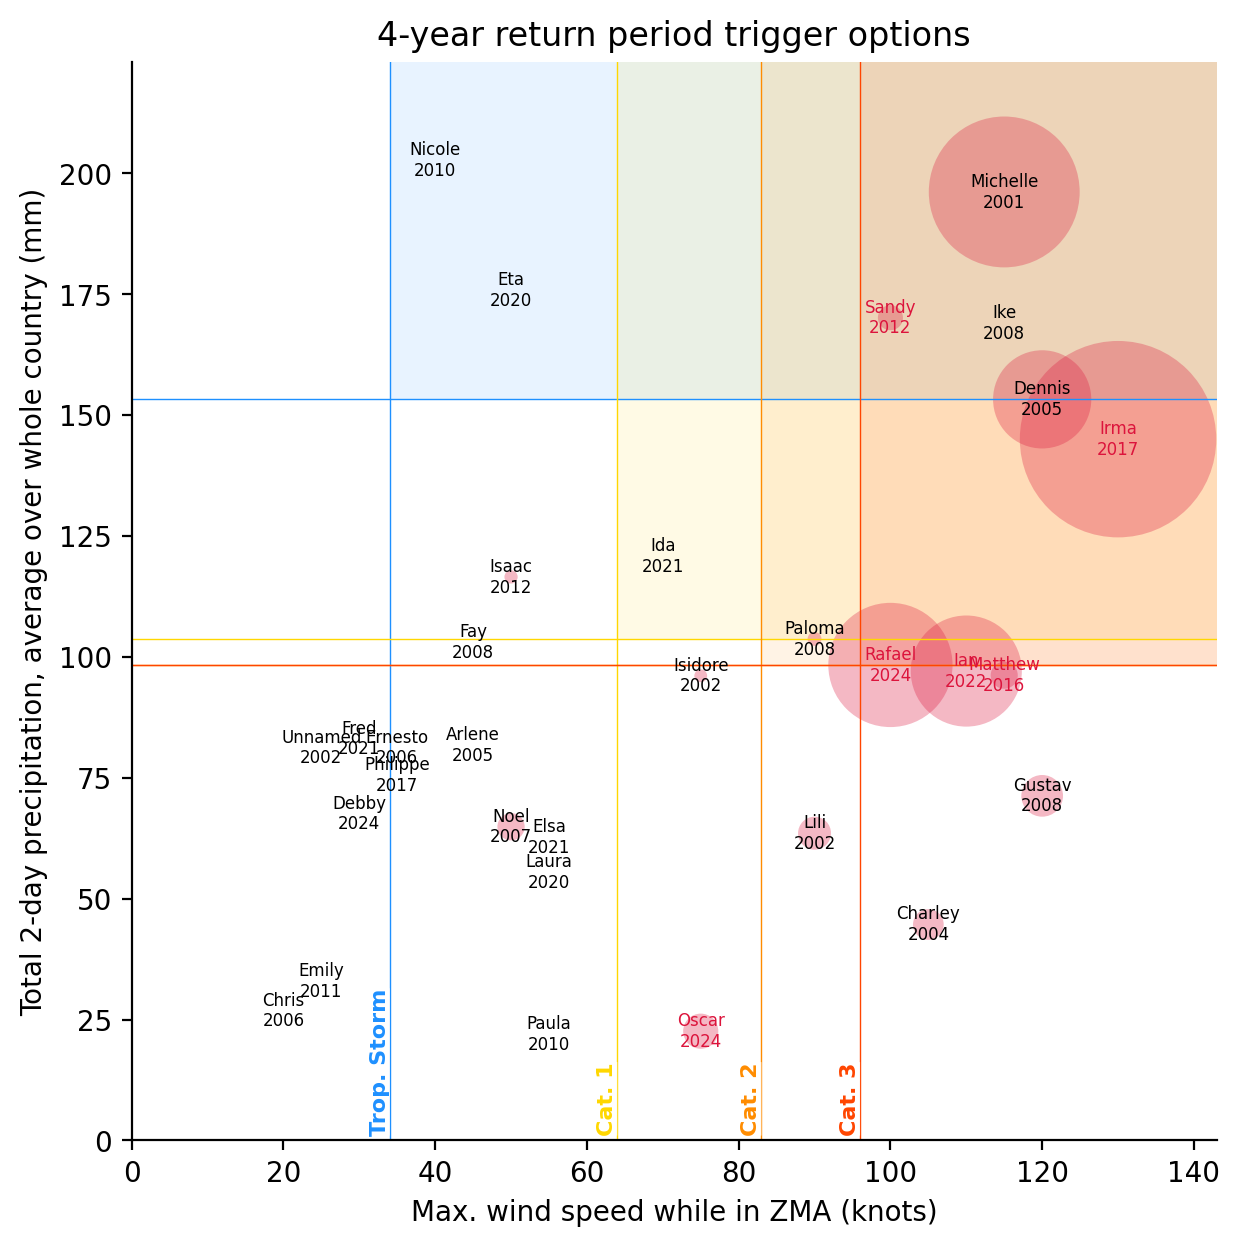

In [500]:
plot_rain_wind_impact(rain_col=rain_col)

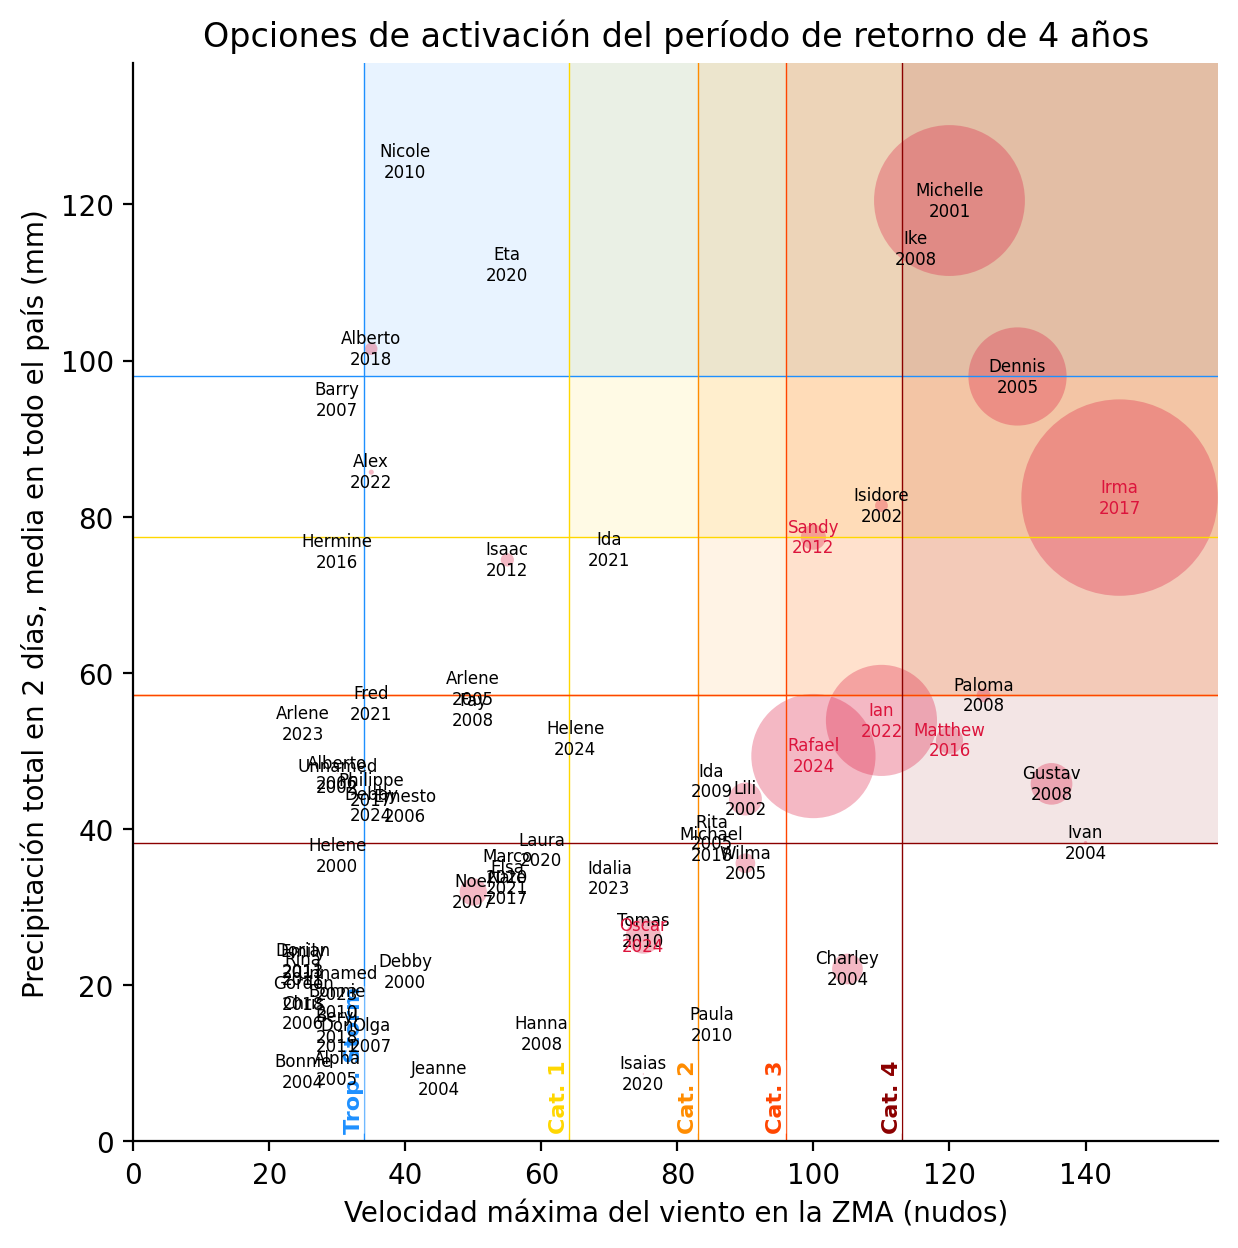

In [428]:
plot_rain_wind_impact(lang="ES")